## Telco Customer Churn - StatsModel Log Regression

In [1]:
%matplotlib inline

import os
import sys
import json
import keras

from pathlib import Path
from pathlib import PureWindowsPath

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

import lime

import lime.explanation 

# Add our local functions to the path
sys.path.append(os.path.join(os.pardir, 'src'))
from models import evaluation


# Constants for Functions (Temporary)
ALGORITHM_NAME = 'lr'
COUNTRY = 'mwi'

Using TensorFlow backend.


In [2]:
# Change the default directory
os.chdir('/home/mike/Documents/mkp_code/Institute of Data Course/telco-customer-churn-project/data/processed')

In [3]:
# Upload Customer Churn data to dataframe
customer_data = pd.read_csv('Telco-Customer-Churn-Processed.csv')

In [4]:
# Drop Unnamed: 0 - This column is not needed
customer_data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# Divide the variables from the target column
target_col = ['Churn']

# Remove the target column
categorical_cols = customer_data.columns
categorical_cols = [col for col in categorical_cols if col not in target_col]

In [6]:
# Variables to a dataframe for processing
X= customer_data[categorical_cols]

In [7]:
# select y = Target Column - Churn
y = customer_data.Churn

In [8]:
# Store coefs for graphs
def get_coefs_df(X, coefs, index=None):
    coefs_df = pd.DataFrame(np.std(X, 0)*coefs)
    coefs_df.columns = ["coef_std"]
    coefs_df['coef'] = coefs
    coefs_df['abs'] = coefs_df.coef_std.apply(abs)
    if index is not None:
        coefs_df.index = index
    return coefs_df

In [9]:
# Partition the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
# Set the Logistic Regression
model = sm.Logit(y_train, x_train)
model = model.fit()

Optimization terminated successfully.
         Current function value: 0.425713
         Iterations 8


In [11]:
# Save coefs 
coefs = get_coefs_df(x_train, model.params)
coefs

,coef_std,coef,abs
gender,-0.003317,-0.006633,0.003317
SeniorCitizen,0.098607,0.267579,0.098607
Partner,0.015658,0.031353,0.015658
Dependents,-0.034114,-0.074915,0.034114
tenure,-1.404308,-1.404564,1.404308
PhoneService,-0.306364,-1.039258,0.306364
MultipleLines,0.069413,0.073144,0.069413
InternetService,0.171639,0.232869,0.171639
OnlineSecurity,-0.233598,-0.272218,0.233598
OnlineBackup,-0.128119,-0.145791,0.128119


In [12]:
# Run the model
y_prob = model.predict(x_train)
y_prob.head()

5925    0.159077
4395    0.347751
1579    0.719614
1040    0.669533
1074    0.218058
dtype: float64

In [13]:
# Define the y_pred
y_pred = (y_prob > 0.5)

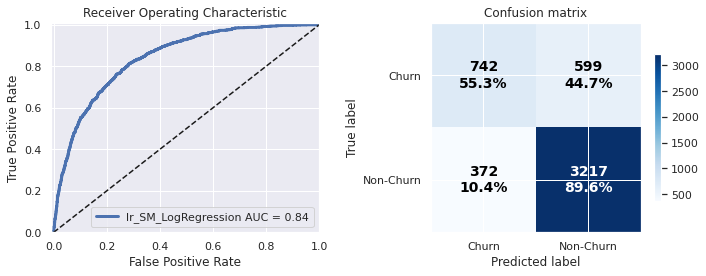

,lr_SM_LogRegression
accuracy,0.803043
recall,0.553318
precision,0.666068
f1,0.604481
cross_entropy,0.425713
roc_auc,0.841537
cohen_kappa,0.474842


In [14]:
# Evaluate performance
metrics = evaluation.evaluate_model(y_train, y_pred, y_prob, 
                                    store_model=True, 
                                    model_name='SM_LogRegression', 
                                    prefix=ALGORITHM_NAME, 
                                    country=COUNTRY, 
                                    model=model, 
                                    features=coefs)